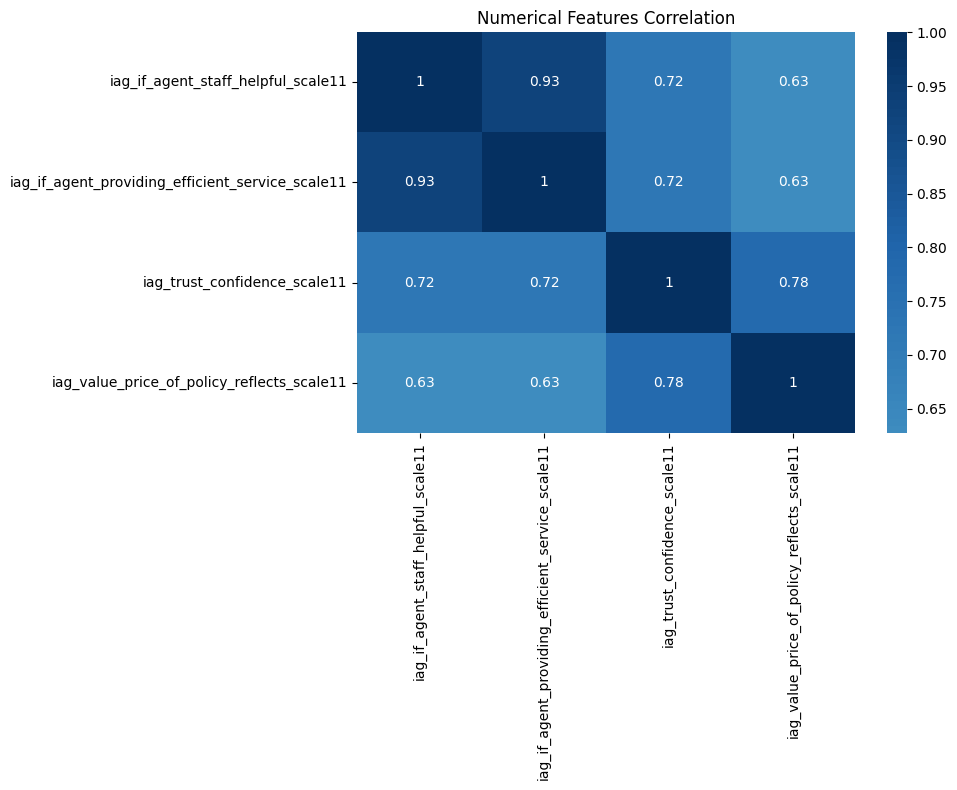


Cramer's V between categorical variables:
iag_product_type_auto & iag_age_band_auto: 0.121
iag_product_type_auto & iag_tenure_band_enum: 0.137
iag_product_type_auto & iag_brand_names_enum: 0.763
iag_product_type_auto & iag_channel_invite_enum: 0.494
iag_age_band_auto & iag_tenure_band_enum: 0.276
iag_age_band_auto & iag_brand_names_enum: 0.177
iag_age_band_auto & iag_channel_invite_enum: 0.059
iag_tenure_band_enum & iag_brand_names_enum: 0.295
iag_tenure_band_enum & iag_channel_invite_enum: 0.157
iag_brand_names_enum & iag_channel_invite_enum: 0.333

Highly correlated numerical features (>0.7):
iag_if_agent_staff_helpful_scale11 & iag_if_agent_providing_efficient_service_scale11: 0.928
iag_if_agent_staff_helpful_scale11 & iag_trust_confidence_scale11: 0.720
iag_if_agent_providing_efficient_service_scale11 & iag_trust_confidence_scale11: 0.722
iag_trust_confidence_scale11 & iag_value_price_of_policy_reflects_scale11: 0.777


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Read the data
df = pd.read_excel('../../data/IAG.xlsx')

# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

# Analyze numerical correlations
numerical_features = [
    'iag_if_agent_staff_helpful_scale11',
    'iag_if_agent_providing_efficient_service_scale11',
    'iag_trust_confidence_scale11',
    'iag_value_price_of_policy_reflects_scale11'
]

# Create and plot numerical correlation matrix
numerical_corr = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_corr, annot=True, cmap='RdBu', center=0)
plt.title('Numerical Features Correlation')
plt.tight_layout()
plt.show()

# Analyze categorical associations
categorical_features = [
    'iag_product_type_auto',
    'iag_age_band_auto',
    'iag_tenure_band_enum',
    'iag_brand_names_enum',
    'iag_channel_invite_enum'
]

# Print Cramer's V for categorical variables
print("\nCramer's V between categorical variables:")
for i in range(len(categorical_features)):
    for j in range(i+1, len(categorical_features)):
        v = cramers_v(df[categorical_features[i]], df[categorical_features[j]])
        print(f"{categorical_features[i]} & {categorical_features[j]}: {v:.3f}")

# Print highly correlated numerical features
print("\nHighly correlated numerical features (>0.7):")
for i in range(len(numerical_features)):
    for j in range(i+1, len(numerical_features)):
        if abs(numerical_corr.iloc[i,j]) > 0.7:
            print(f"{numerical_features[i]} & {numerical_features[j]}: {numerical_corr.iloc[i,j]:.3f}")

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Read the data
df = pd.read_excel('../../data/IAG.xlsx')

# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

# All categorical features to analyze
all_categorical_features = [
    'iag_business_unit_ug',
    'iag_region_ug',
    'iag_site_ug',
    'iag_team_name_ug',
    'iag_product_type_auto',
    'iag_product_sub_type_auto'
]

# Print Cramer's V for all pairs
print("Cramer's V between organizational and product features:")
for i in range(len(all_categorical_features)):
    for j in range(i+1, len(all_categorical_features)):
        v = cramers_v(df[all_categorical_features[i]], df[all_categorical_features[j]])
        print(f"{all_categorical_features[i]} & {all_categorical_features[j]}: {v:.3f}")

# Print unique values in each category
print("\nNumber of unique values in each category:")
for feature in all_categorical_features:
    print(f"{feature}: {df[feature].nunique()} unique values")

Cramer's V between organizational and product features:
iag_business_unit_ug & iag_region_ug: 0.639
iag_business_unit_ug & iag_site_ug: 0.917
iag_business_unit_ug & iag_team_name_ug: 0.639
iag_business_unit_ug & iag_product_type_auto: 0.133
iag_business_unit_ug & iag_product_sub_type_auto: 0.045
iag_region_ug & iag_site_ug: 0.962
iag_region_ug & iag_team_name_ug: 0.985
iag_region_ug & iag_product_type_auto: 0.154
iag_region_ug & iag_product_sub_type_auto: 0.040
iag_site_ug & iag_team_name_ug: 0.977
iag_site_ug & iag_product_type_auto: 0.320
iag_site_ug & iag_product_sub_type_auto: 0.183
iag_team_name_ug & iag_product_type_auto: 0.153
iag_team_name_ug & iag_product_sub_type_auto: 0.040
iag_product_type_auto & iag_product_sub_type_auto: 0.755

Number of unique values in each category:
iag_business_unit_ug: 2 unique values
iag_region_ug: 3 unique values
iag_site_ug: 48 unique values
iag_team_name_ug: 3 unique values
iag_product_type_auto: 10 unique values
iag_product_sub_type_auto: 3 uniq

1. Hierarchical Business Features:

hierarchical_features = [
    'iag_business_unit_ug',      # Top level
    'iag_region_ug',             # Regional level
    'iag_site_ug',               # Location level
    'iag_team_name_ug'           # Team level
]

2. Product Hierarchy

product_features = [
    'iag_product_type_auto',     # Main product type
    'iag_product_sub_type_auto'  # Product subtype
]